In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model


model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16),
    Softmax()
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
softmax (Softmax)            (None, 16)                0         
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential()
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=(28,28,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),strides=(1,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','mae'])

In [9]:
# Print the resulting model attributes

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [28]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [29]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [30]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [31]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

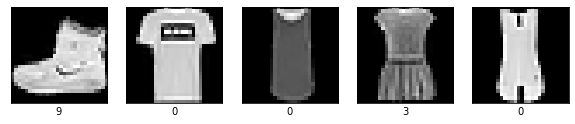

In [32]:
# Display one of the images

import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

#### Fit the model

In [33]:
# Fit the model

## 增加一个维度，更好的方式是np.expand_dims
train_images = train_images.reshape(train_images.shape + (1,))
test_images = test_images.reshape(test_images.shape + (1,))

history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2644 - accuracy: 0.9044 - mae: 4.4200 - val_loss: 0.2849 - val_accuracy: 0.8958 - val_mae: 4.4200
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2339 - accuracy: 0.9144 - mae: 4.4200 - val_loss: 0.2709 - val_accuracy: 0.8999 - val_mae: 4.4200
Epoch 3/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2105 - accuracy: 0.9221 - mae: 4.4200 - val_loss: 0.2722 - val_accuracy: 0.8999 - val_mae: 4.4200
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1866 - accuracy: 0.9308 - mae: 4.4200 - val_loss: 0.2562 - val_accuracy: 0.9079 - val_mae: 4.4200
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1703 - accuracy: 0.9362 - mae: 4.4200 - val_loss: 0.2516 - val_accuracy: 0.9142 - val_mae: 4.4200
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1539 - accuracy: 0.9418 - mae:

#### Plot training history

In [34]:
# Load the history into a pandas Dataframe

from pprint import pprint
import pandas as pd 
# Load the history into a pandas Dataframe
df_history = pd.DataFrame(history.history)

print(history)
print(history.history.keys())
pprint(history.history)

df_history

dict_keys(['loss', 'accuracy', 'mae', 'val_loss', 'val_accuracy', 'val_mae'])
{'accuracy': [0.9043999910354614,
              0.9144166707992554,
              0.9220666885375977,
              0.9308333396911621,
              0.9361833333969116,
              0.9418333172798157,
              0.9472000002861023,
              0.95333331823349,
              0.9567166566848755,
              0.9610666632652283],
 'loss': [0.26435843110084534,
          0.23389005661010742,
          0.21050703525543213,
          0.18663066625595093,
          0.17033131420612335,
          0.15389621257781982,
          0.139186829328537,
          0.1259523332118988,
          0.11434324085712433,
          0.10340795665979385],
 'mae': [4.420008659362793,
         4.420006275177002,
         4.4200053215026855,
         4.4200119972229,
         4.4200119972229,
         4.420011043548584,
         4.420008182525635,
         4.420010566711426,
         4.420003414154053,
         4.420006275177002

,loss,accuracy,mae,val_loss,val_accuracy,val_mae
0,0.264358,0.904400,4.420009,0.284865,0.8958,4.419997
1,0.233890,0.914417,4.420006,0.270923,0.8999,4.419997
2,0.210507,0.922067,4.420005,0.272183,0.8999,4.419997
3,0.186631,0.930833,4.420012,0.256247,0.9079,4.419997
4,0.170331,0.936183,4.420012,0.251563,0.9142,4.419997
5,0.153896,0.941833,4.420011,0.270588,0.9058,4.419997
6,0.139187,0.947200,4.420008,0.313300,0.9010,4.419997
7,0.125952,0.953333,4.420011,0.370203,0.9003,4.419997
8,0.114343,0.956717,4.420003,0.309478,0.9062,4.419997
9,0.103408,0.961067,4.420006,0.311047,0.9104,4.419997


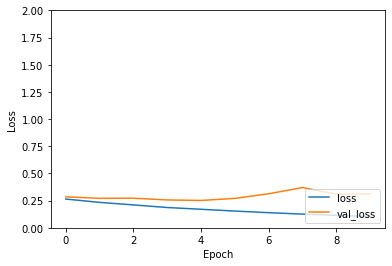

In [35]:
# Make a plot for the loss

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

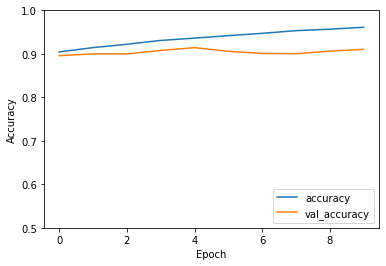

In [36]:
# Make a plot for the accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

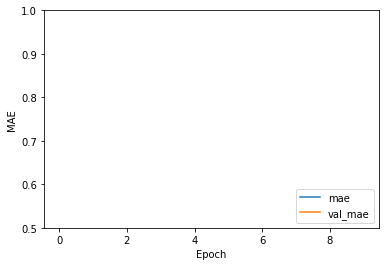

In [37]:
# Make a plot for the additional metric

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [40]:
# Evaluate the model

train_loss, train_acc, train_mae = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc, test_mae  = model.evaluate(test_images,  test_labels, verbose=2)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_acc, 100*test_acc)) 
print('Train Loss: {:0.1f}%, Test Loss: {:0.1f}%'.format(train_loss, test_loss)) 
print('Train MAE: {:0.1f}%, Test MAE: {:0.1f}%'.format(train_mae, test_mae)) 

1875/1875 - 19s - loss: 0.0793 - accuracy: 0.9704 - mae: 4.4200
313/313 - 3s - loss: 0.3110 - accuracy: 0.9104 - mae: 4.4200
Train Accuracy: 97.0%, Test Accuracy: 91.0%
Train Loss: 0.1%, Test Loss: 0.3%
Train MAE: 4.4%, Test MAE: 4.4%


#### Make predictions from the model

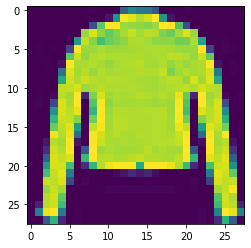

Label: Coat


In [42]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = np.squeeze(test_images[random_inx])
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [43]:
# Get the model predictions

predictions = model(np.array([test_images[random_inx]]), training=False)
predictions = np.argmax(predictions, 1)
predict_labels = [labels[prediction] for prediction in predictions] 
print(predict_labels)

['Coat']
